In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Processing

In [2]:
df = pd.read_csv ('train.csv', nrows=100000)
print (df)

           ID  target        v1        v2 v3        v4         v5        v6  \
0           3       1  1.335739  8.727474  C  3.921026   7.915266  2.599278   
1           4       1       NaN       NaN  C       NaN   9.191265       NaN   
2           5       1  0.943877  5.310079  C  4.410969   5.326159  3.979592   
3           6       1  0.797415  8.304757  C  4.225930  11.627438  2.097700   
4           8       1       NaN       NaN  C       NaN        NaN       NaN   
...       ...     ...       ...       ... ..       ...        ...       ...   
99995  199831       0       NaN       NaN  C       NaN        NaN       NaN   
99996  199832       1  1.839488  4.917973  C  4.810994   9.473522  2.471592   
99997  199833       1  2.702045  6.486235  C  4.686911  11.728311  2.914639   
99998  199837       0       NaN       NaN  C       NaN        NaN       NaN   
99999  199838       1  1.954852  4.920632  C  5.511279   9.054855  3.054755   

             v7        v8  ...      v122      v123 

In [3]:
df.replace(np.nan, 0)

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,0.000000,0.000000,C,0.000000,9.191265,0.000000,0.000000,2.301630,...,0.000000,0.000000,0.598896,AF,0.000000,0.000000,1.957825,0,0.000000,0.000000
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,0.000000,0.000000,C,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,Z,0.000000,0.000000,0.000000,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199831,0,0.000000,0.000000,C,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,CG,0.000000,0.000000,0.000000,0,0.000000,0.000000
99996,199832,1,1.839488,4.917973,C,4.810994,9.473522,2.471592,3.103692,1.335742,...,6.111111,3.700186,0.512357,BJ,1.820949,5.379972,2.044068,0,1.098398,2.333333
99997,199833,1,2.702045,6.486235,C,4.686911,11.728311,2.914639,3.339824,0.321091,...,5.856574,2.435454,0.063146,CG,1.773637,4.132181,2.239824,0,1.181730,2.960527
99998,199837,0,0.000000,0.000000,C,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,BD,0.000000,0.000000,0.000000,2,0.000000,0.000000


In [4]:
df.shape
#Terdapat 114321 baris dan 133 kolom

(100000, 133)

In [5]:
df.columns

Index(['ID', 'target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8',
       ...
       'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130',
       'v131'],
      dtype='object', length=133)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 101.5+ MB


In [7]:
df.isnull().sum()

ID            0
target        0
v1        43552
v2        43517
v3         3027
          ...  
v127      43552
v128      42542
v129          0
v130      43562
v131      43609
Length: 133, dtype: int64

<AxesSubplot:>

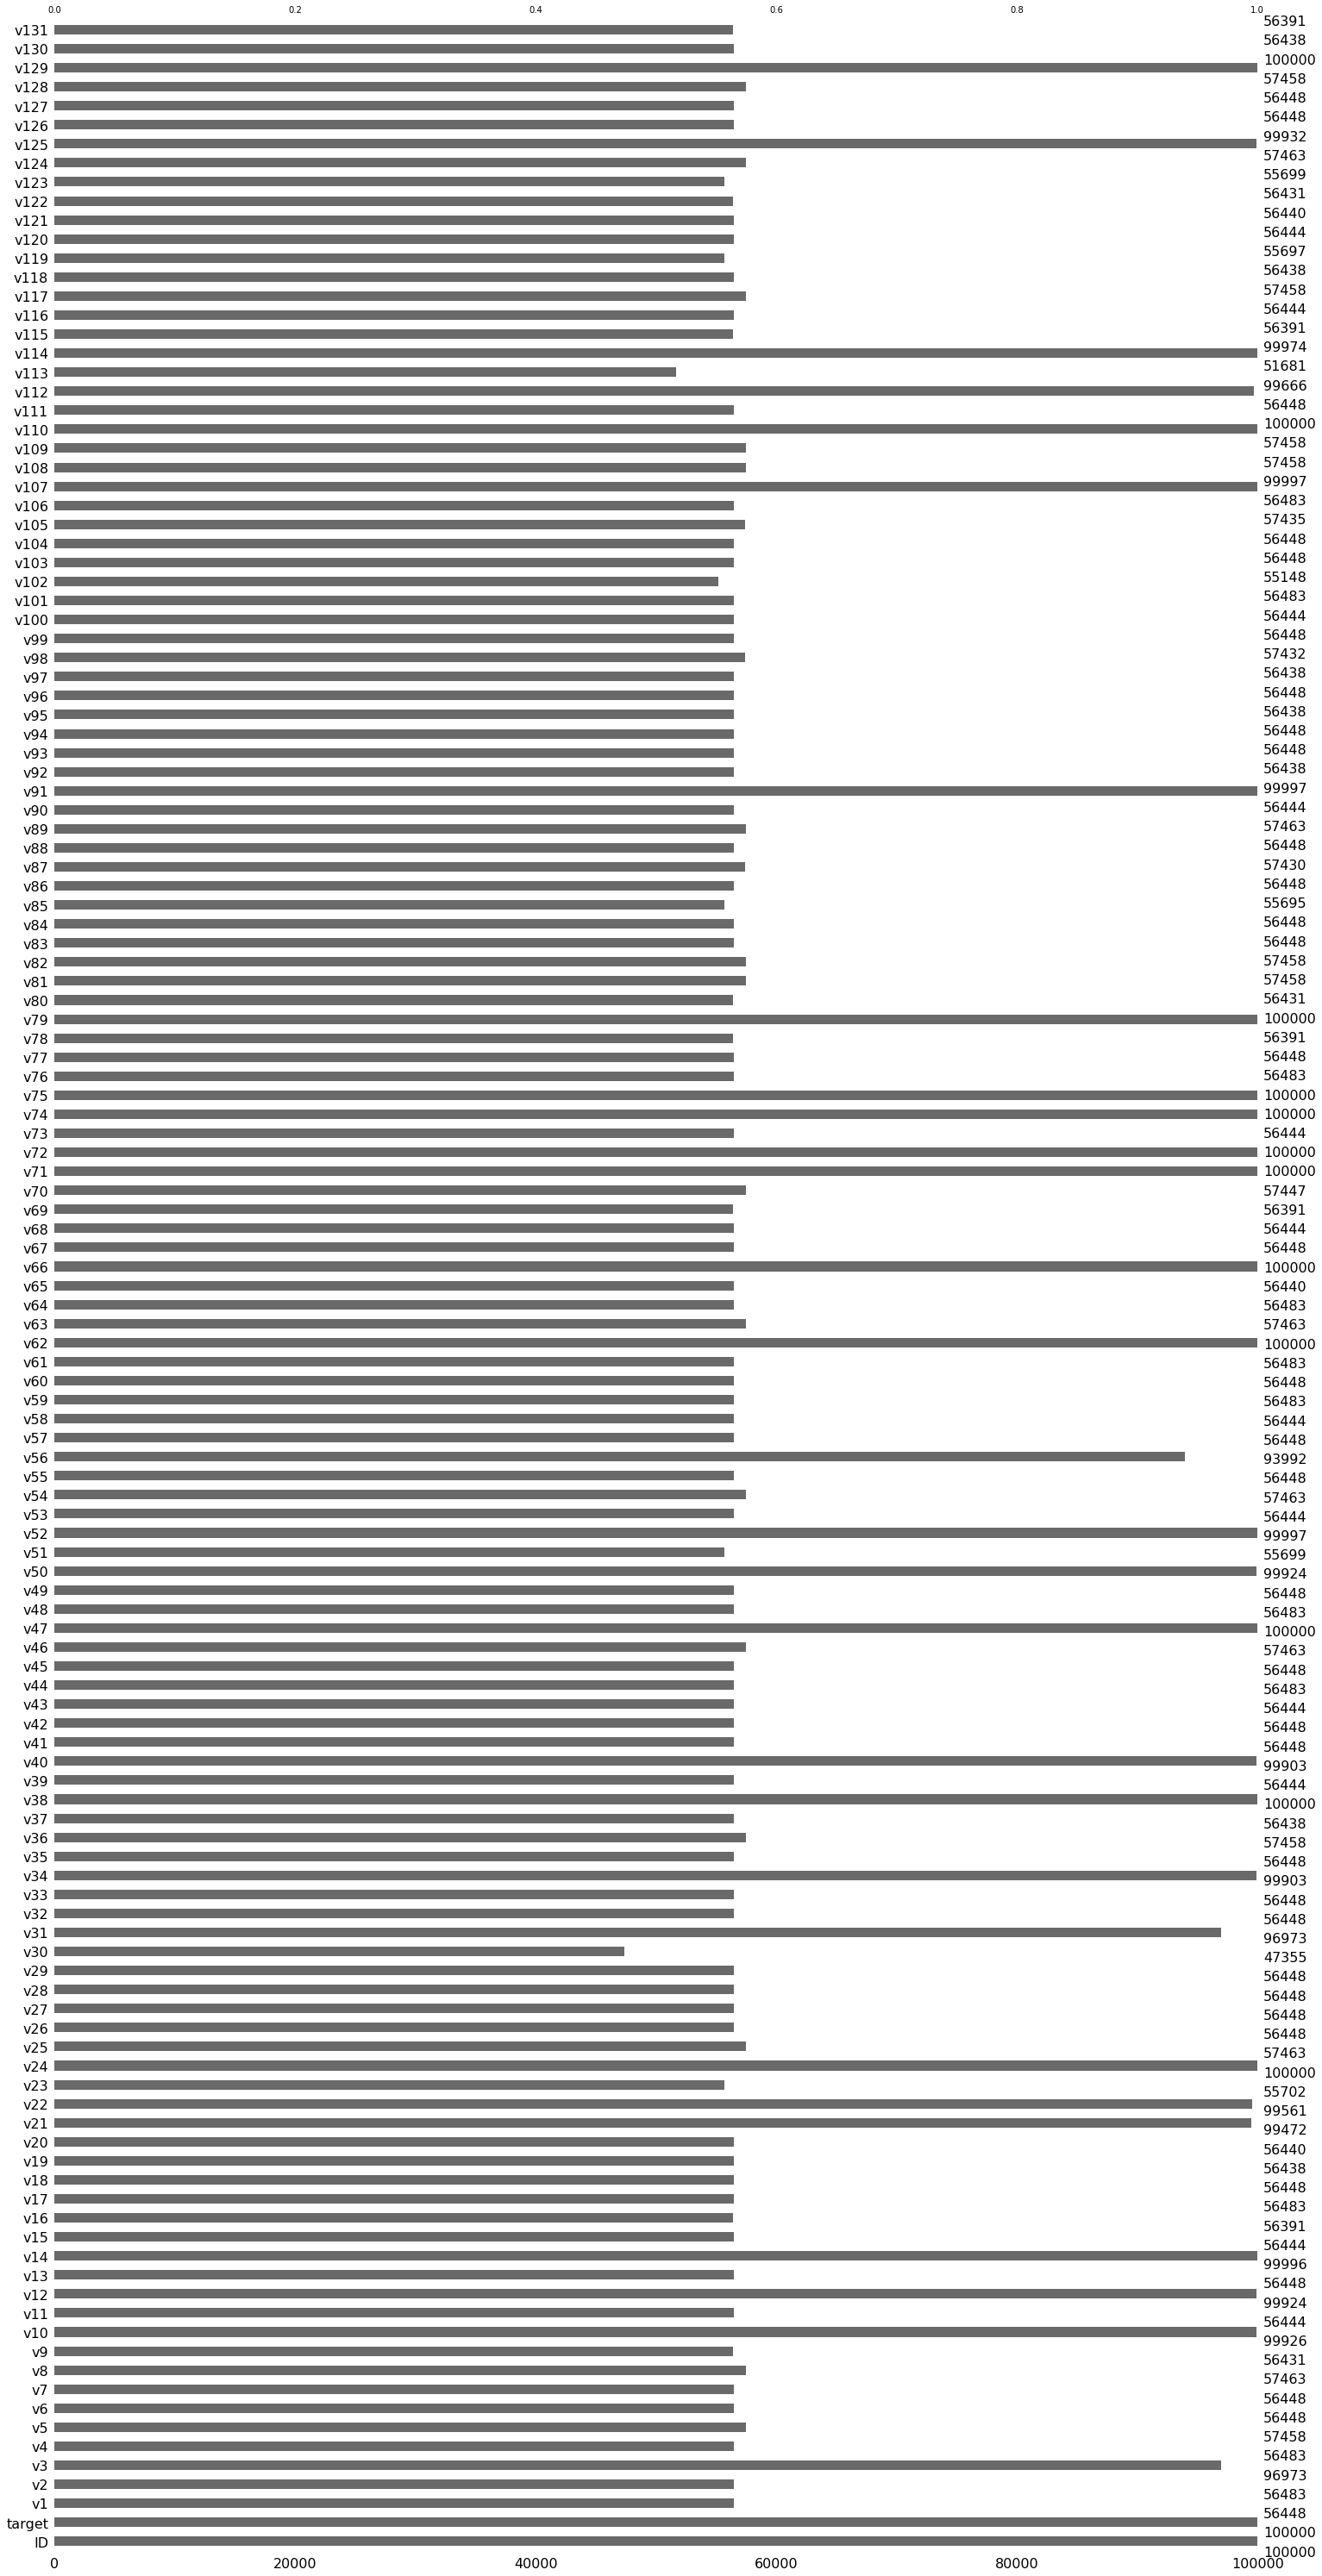

In [8]:
import missingno as msno
msno.bar(df)

In [9]:
pd.set_option("display.max_column", None)
df.head(20)

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088e+00,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,3.575369e-02,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,5.988956e-01,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964e+00,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,1.345191e-02,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,2.873217e-01,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,8.591954,3.329176,4.780357,H,16.621695,0.139721,1.178161,BW,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,A,9.703065,18.568129,9.425288,13.594728,F,2,2.272541,B,D,2.188198,8.213602,13.448277,B,1.947261,4.797873,13.315819,1.681034,1.3793

Data Analysis

In [10]:
df.describe()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v72,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,100000.00000,100000.000000,5.644800e+04,5.648300e+04,5.648300e+04,5.745800e+04,5.644800e+04,5.644800e+04,5.746300e+04,5.643100e+04,9.992600e+04,5.644400e+04,9.992400e+04,5.644800e+04,9.999600e+04,5.644400e+04,5.639100e+04,5.648300e+04,5.644800e+04,5.643800e+04,56440.000000,99472.000000,5.570200e+04,57463.000000,5.644800e+04,5.644800e+04,5.644800e+04,5.644800e+04,5.644800e+04,5.644800e+04,9.990300e+04,5.644800e+04,5.745800e+04,5.643800e+04,100000.000000,5.644400e+04,9.990300e+04,5.644800e+04,5.644800e+04,5.644400e+04,5.648300e+04,5.644800e+04,57463.000000,5.648300e+04,5.644800e+04,9.992400e+04,5.569900e+04,5.644400e+04,57463.000000,5.644800e+04,5.644800e+04,5.644400e+04,5.648300e+04,5.644800e+04,5.648300e+04,100000.000000,57463.000000,5.648300e+04,56440.000000,5.644800e+04,56444.000000,5.639100e+04,57447.000000,100000.000000,5.644400e+04,5.648300e+04,5.644800e+04,5.639100e+04,5.643100e+04,57458.000000,5.745800e+04,5.644800e+04,5.644800e+04,5.569500e+04,5.644800e+04,57430.000000,5.644800e+04,57463.000000,5.644400e+04,5.643800e+04,5.644800e+04,5.644800e+04,5.643800e+04,5.644800e+04,5.643800e+04,5.743200e+04,5.644800e+04,5.644400e+04,5.648300e+04,5.514800e+04,5.644800e+04,5.644800e+04,57435.000000,5.648300e+04,5.745800e+04,5.745800e+04,5.644800e+04,9.997400e+04,5.639100e+04,5.644400e+04,5.745800e+04,5.643800e+04,5.569700e+04,5.644400e+04,5.644000e+04,5.643100e+04,55699.000000,5.746300e+04,5.644800e+04,5.644800e+04,5.745800e+04,100000.000000,5.643800e+04,5.639100e+04
mean,99901.02579,0.761900,1.628943e+00,7.459775e+00,4.146107e+00,8.749046e+00,2.437136e+00,2.483790e+00,1.495259e+00,9.028353e+00,1.883065e+00,1.544818e+01,6.881120e+00,3.797162e+00,1.209303e+01,2.080161e+00,4.921182e+00,3.834901e+00,8.413038e-01,2.222177e-01,17.773048,7.027598,1.086736e+00,1.696188,1.875908e+00,2.743773e+00,5.097711e+00,8.206592e+00,1.621355e+00,2.159682e+00,6.408582e+00,8.124049e+00,1.337219e+01,7.409377e-01,0.090950,1.235541e+00,1.046222e+01,7.182336e+00,1.292470e+01,2.216747e+00,1.079831e+01,9.143957e+00,1.629021,1.253525e+01,8.016542e+00,1.504798e+00,7.191923e+00,1.571185e+01,1.251731,1.557807e+00,4.077976e+00,7.692685e+00,1.059117e+01,1.714329e+00,1.458457e+01,1.030390,1.685190,6.346822e+00,15.848566,9.286460e+00,17.566571,9.449066e+00,12.275186,1.431760,2.432338e+00,2.407139e+00,7.307838e+00,1.333745e+01,2.207491e+00,7.280312,6.209847e+00,2.171789e+00,1.606533e+00,2.821729e+00,1.219714e+00,10.186947,1.923664e+00,1.514633,9.672580e-01,5.824153e-01,5.478475e+00,3.853452e+00,6.657263e-01,6.458424e+00,7.622674e+00,7.665807e+00,1.251870e+00,1.210084e+01,6.871230e+00,2.890410e+00,5.297032e+00,2.642666e+00,1.080682,1.179448e+01,2.153375e+00,4.185511e+00,3.362842e+00,1.357696e+01,1.054782e+01,2.291385e+00,8.313057e+00,8.364273e+00,3.163011e+00,1.290302e+00,2.735433e+00,6.820970e+00,3.544605,9.199340e-01,1.673147e+00,3.237660e+00,2.031835e+00,0.310420,1.924138e+00,1.737789e+00
std,57629.78686,0.425923,1.082900e+00,2.957387e+00,1.148624e+00,2.038039e+00,5.978858e-01,5.900167e-01,2.776742e+00,1.930473e+00,1.393741e+00,7.904098e-01,9.246029e-01,1.174844e+00,1.443836e+00,7.321563e-01,1.786943e+00,1.915999e+00,6.146441e-01,1.596924e-01,1.157657,1.071853,3.990009e+00,2.946642,5.507782e-01,8.348140e-01,2.674634e+00,1.284528e+00,5.629947e-01,9.836156e-01,2.028189e+00,1.338928e+00,2.353603e+00,5.438087e-01,0.582187,2.354713e+00,3.172332e+00,1.004669e+00,9.969048e-01,6.494262e-01,2.110333e+00,2.065817e+00,2.886386,2.195171e+00,9.020179e-01,1.170033e+00,2.508748e+00,7.992496e-01,2.307717,8.

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


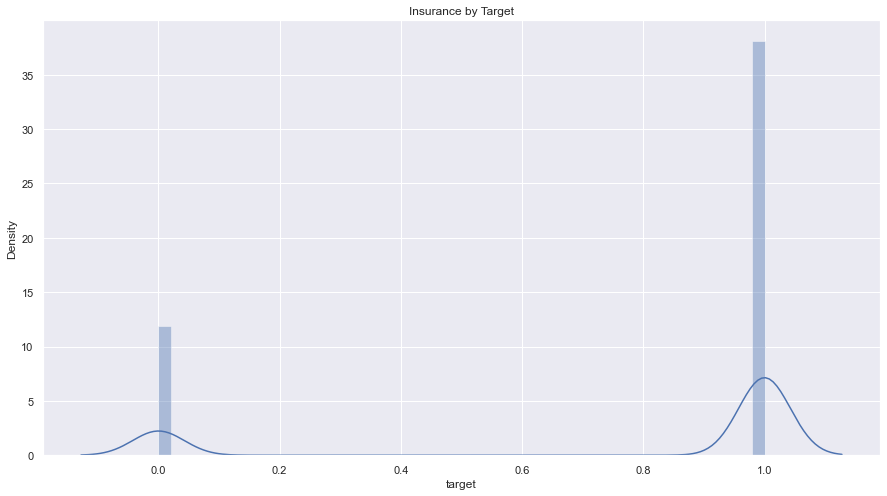

In [11]:
sns.set()
plt.figure(figsize=(15,8))
sns.distplot(df['target'])
plt.title('Insurance by Target')
plt.show()

In [12]:
df['target'].value_counts()

1    76190
0    23810
Name: target, dtype: int64

In [13]:
x = df.drop(['v3', 'v22', 'v24', 'v30', 'v31', 'v47', 'v52', 'v56', 'v66', 'v71', 'v72', 'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125'], axis=1)
x.replace(np.nan, 0)

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,-1.716131e-08,0.139412,1.720818,3.393503,0.590122,8.880867,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,12.171733,8.086643,0.899420,7.277792,16.747968,0.037096,1.299638,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,9.314079,15.231789,17.142857,11.784549,1.614988,2.230940,7.292418,8.571429,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,2.382692,3.930922,0.433213,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,0.000000,0.000000,0.000000,9.191265,0.000000,0.000000,2.301630,0.000000,1.312910,0.000000,6.507647,0.000000,11.636386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.763110,0.000000e+00,3.056144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.615077,0.000000,14.579479,0.000000,0,0.000000,14.305766,0.000000,0.000000,0.000000,0.000000,0.000000,2.449959,0.000000,0.000000,1.379210,0.000000,0.000000,1.129469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,2.544736,0.000000,0.000000,0.000000,0.000000,0.000000,12.053353,0.000000,0.000000,0.000000,0.000000,0.000000,7.277655,3.430691,0.000000,0.000000,0.000000,0.000000,9.848004,0.000000,2.678584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.303967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.505335,0.000000,1.825361,4.247858,0.000000,10.308044,0.000000,0.000000,10.595357,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.598896,0.000000,0.000000,1.957825,0,0.000000,0.000000
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,-2.785053e-07,0.113997,2.244897,5.306122,0.836005,7.499999,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,12.711328,6.836734,0.604504,9.637627,15.102041,0.085573,0.765305,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,8.367347,11.040463,5.882353,8.460654,2.413618,1.963971,5.918368,11.764705,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,1.375753,1.184211,3.367348,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,-4.805344e-07,0.148843,1.308269,2.303640,8.926662,8.874521,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,12.194855,8.591954,3.329176,4.780357,16.621695,0.139721,1.178161,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6

<AxesSubplot:>

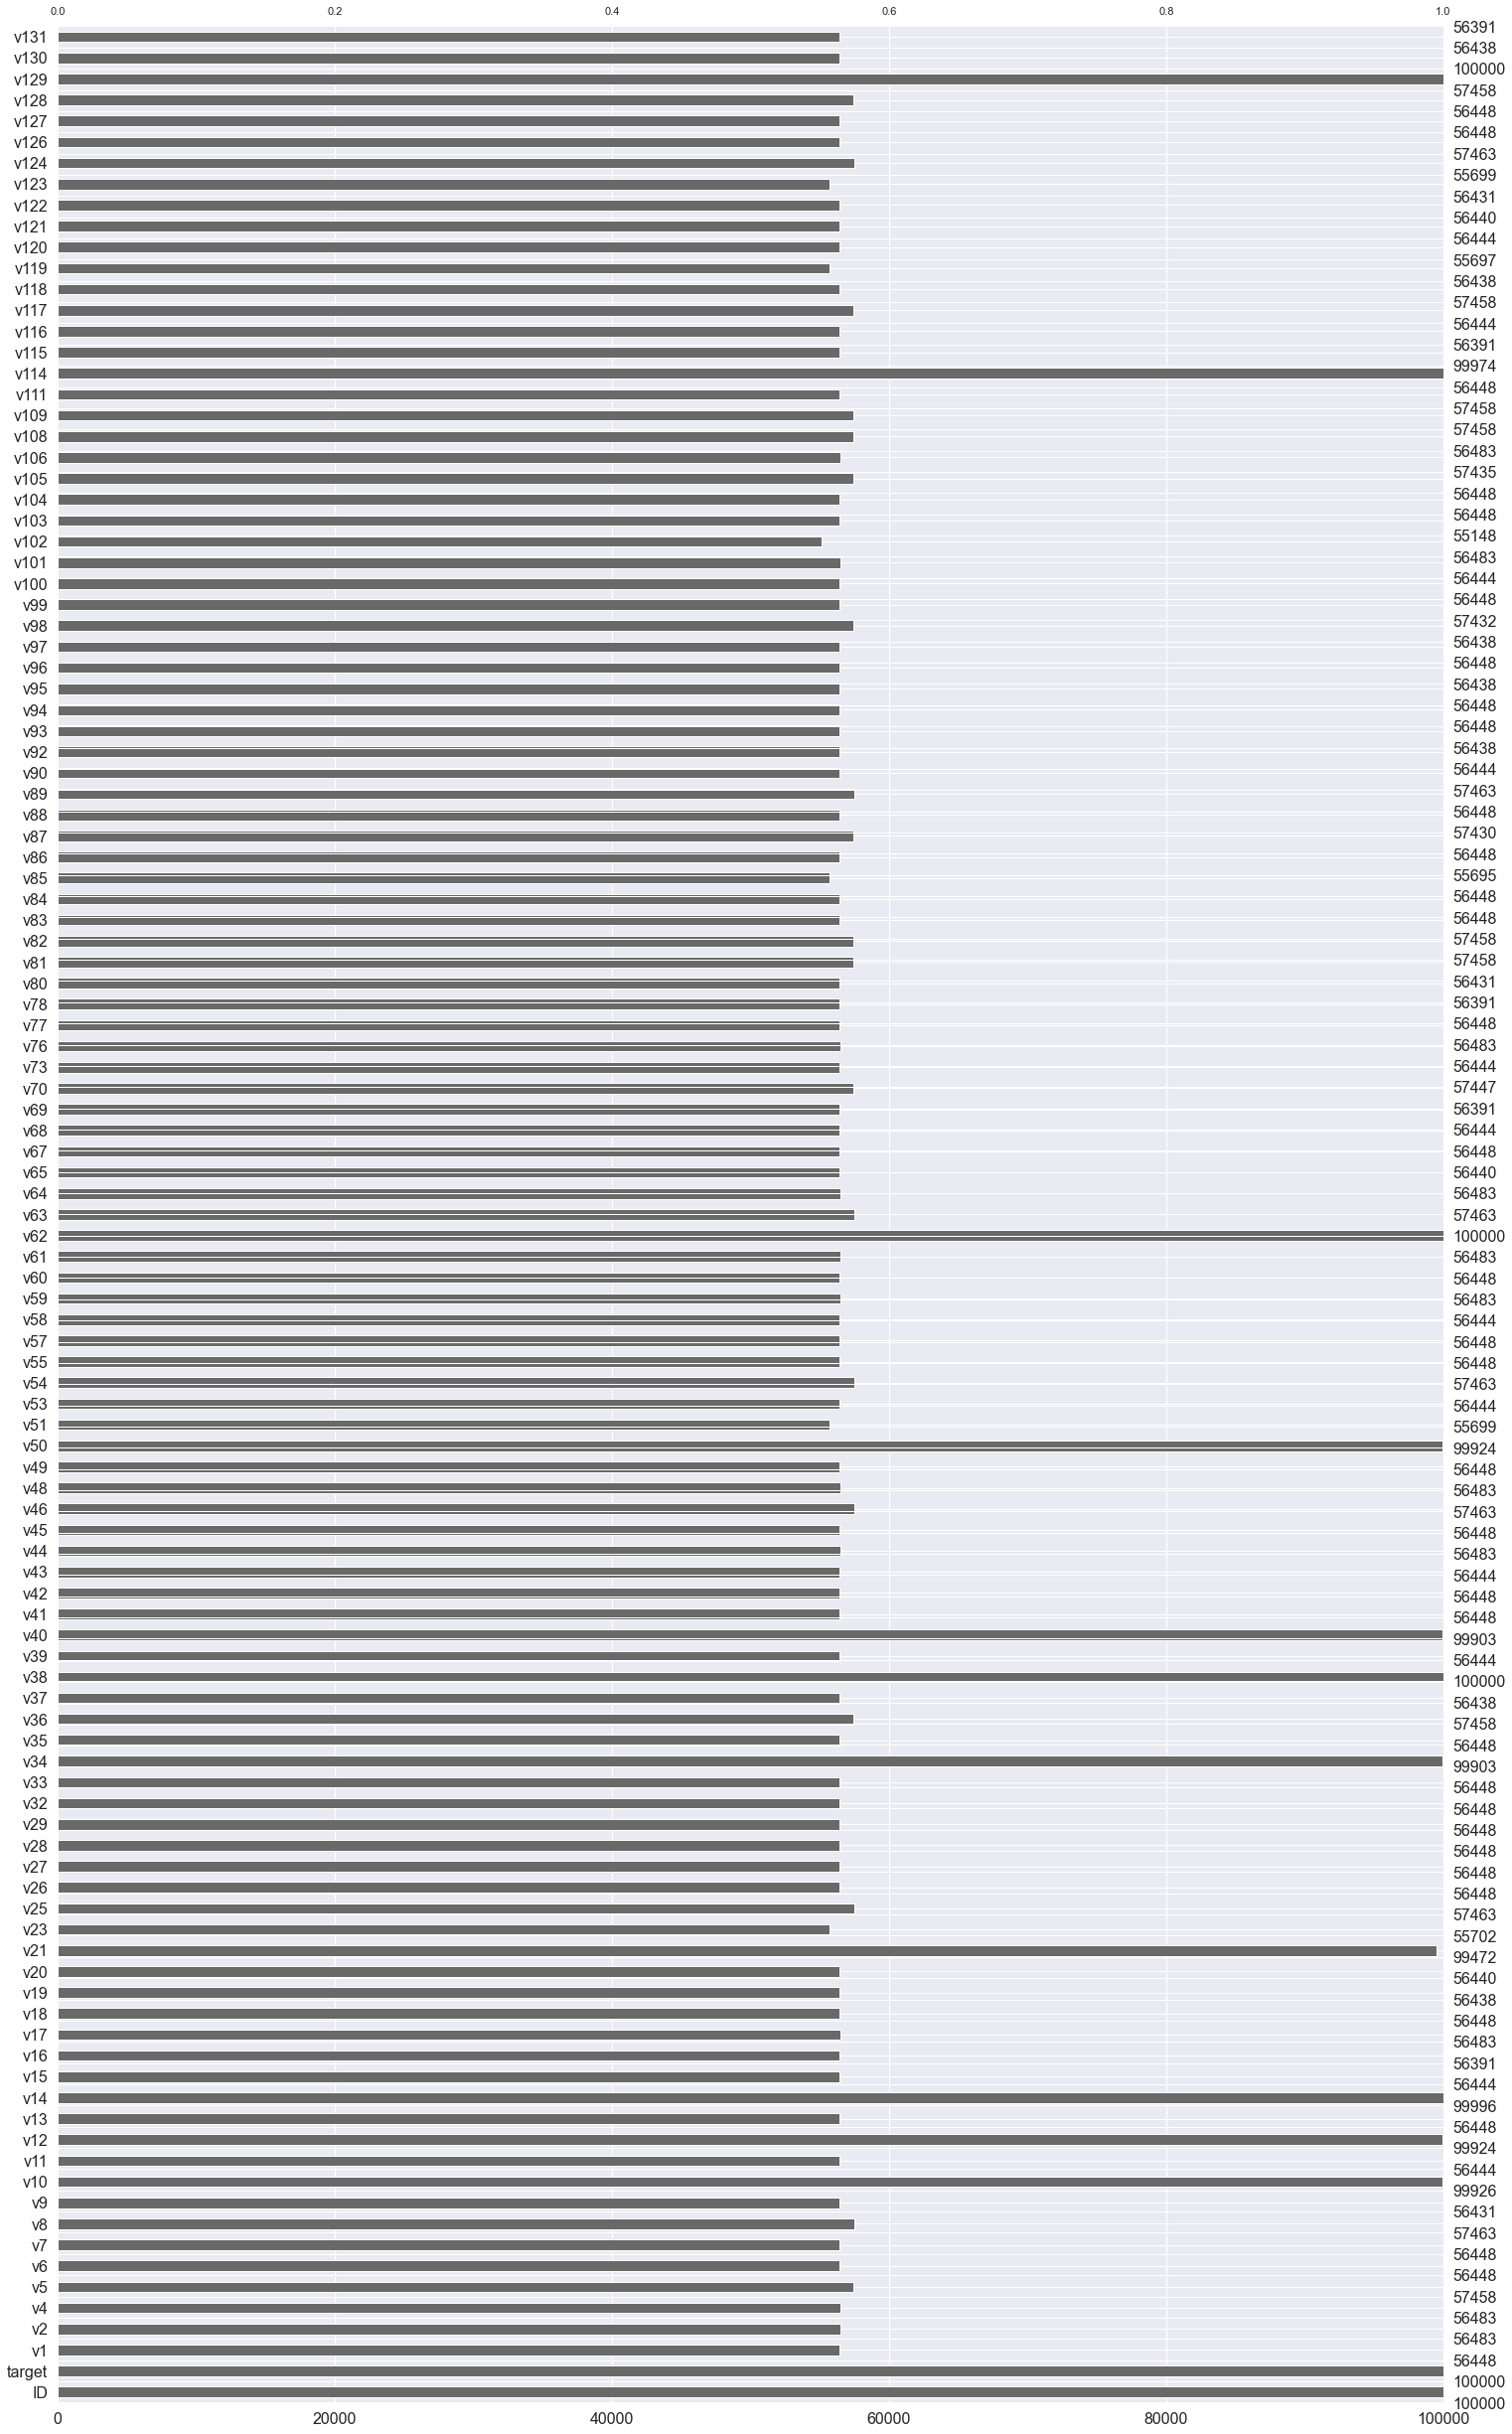

In [14]:
msno.bar(x)

In [15]:
y = x.drop(labels=['target', 'ID'], axis=1)
y.replace(np.nan, 0)

z = x['target']

In [16]:
print(z)

0        1
1        1
2        1
3        1
4        1
        ..
99995    0
99996    1
99997    1
99998    0
99999    1
Name: target, Length: 100000, dtype: int64


In [17]:
y_train, y_test, z_train, z_test = train_test_split(y, z, test_size=0.2, random_state=2)

In [18]:
print (y.shape, y_test.shape, y_train.shape)

(100000, 111) (20000, 111) (80000, 111)


In [19]:
y_train.replace(np.nan, 0)

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
34555,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.291028,0.000000,6.813111,0.000000,10.760797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.832937,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.145481,0.000000,0.000000,0.000000e+00,0,0.000000e+00,11.863830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.485657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.311838,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,0.000000e+00
4442,1.765057e+00,2.367428,1.214239,6.514571,1.693501,1.872392,0.623305,10.125523,1.291028,14.856397,6.738139,4.585776,11.185820,2.579737,4.721030,0.568371,0.537847,0.289355,16.298677,6.320726,7.167381e+00,0.767204,1.661697,1.872392,3.583494,6.356589,2.164579,5.557544,2.709328,7.847347,15.770768,1.019108e+00,0,6.701351e-07,15.715940,6.785928,12.939773,1.984333,6.209176,12.985058,0.646156,18.695021,8.228980,0.694005,14.860823,15.009380,0.266497,5.223613,3.899820,19.053876,8.091331,1.486782,7.256538,1,0.609447,1.139956,11.129061,9.135361,17.161630,12.532190,12.694577,3.290906,0.322415,6.141920,14.592275,4.602511,10.500680,2.605621,6.082291,3.935600,4.615384,1.180679,8.058846,0.477042,0.297668,1.034611,0.557745,2.293659,4.029404,0.831959,4.770424,8.662420,6.878884,0.655932,0.919841,2.595410,0.000000,6.713493,3.106921,0.281597,3.449378,1.223434,1.947735,6.225402,8.148882,7.467812,2.551595,6.322620,9.681530,1.978912e+01,2.838371,7.391303,5.523013,12.042117,0.084556,1.256774,1.095707,1.090235,0,5.936305,6.866958e-01
50811,1.389999e+00,3.442388,1.680615,7.817529,1.793849,1.436957,2.181684,8.786611,1.838074,15.085359,6.859531,5.299246,12.413547,2.759564,5.539215,1.735051,1.047425,0.389998,16.498313,7.345202,1.975804e+01,2.560080,1.386085,1.094154,9.104126,7.161306,2.218831,3.831885,6.764820,8.809579,15.972370,1.045752e+00,0,8.462838e-07,9.853846,6.846678,13.012444,1.665805,8.141158,14.217817,2.197985,16.043767,8.208500,1.473112,11.187615,15.462295,1.896236,2.831651,3.000705,18.906883,9.989593,1.248337,10.895865,1,2.577221,3.103950,13.129448,9.077248,17.894738,9.852941,16.008716,3.394981,1.044445,6.813806,13.676471,3.152022,9.099472,3.504882,3.930500,3.183846,5.541211,1.422869,8.507191,0.694999,2.637220,1.378892,0.863841,2.596432,4.167924,1.105164,5.536511,9.477124,2.358147,0.903967,0.094467,3.790134,2.680551,6.282682,3.670091,1.087824,7.017430,1.740367,1.939122,5.832355,14.350125,10.147058,1.901639,7.338717,10.522875,1.453254e+01,2.105264,4.788330,5.634589,12.539832,1.968182,1.571310,1.109416,1.274008,0,5.333334,7.843130e-01
45326,-2.912497e-07,8.503985,4.293111,7.330195,2.285714,1.877552,0.010631,10.000001,3.938732,16.347826,8.414374,3.155975,14.911502,1.557632,7.499999,2.615205,0.076330,0.222902,17.788819,8.828821,5.225603e-08,0.260230,1.496598,1.877552,0.521701,8.734694,1.346938,1.306122,6.602350,8.979593,11.743010,-3.978531e-08,0,4.006792e-01,12.224875,7.673470,12.326531,1.739130,9.710293,10.140831,0.108834,13.772815,8.571429,1.439367,7.561958,16.635514,0.160395,0.489795,4.081633,0.37

In [20]:
y_test.replace(np.nan, 0)

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
6448,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.312911,0.000000,6.644918,0.000000,10.610681,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.051605,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.417672,0.000000,0.000000,0.000000e+00,0,0.000000e+00,13.036683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.997725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,11.440366,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000e+00
50680,1.944577e+00,8.984388,3.883162,8.938233,1.949355,2.207358,0.979060,6.956521,1.050329,14.859612,6.228749,3.993823,11.636386,2.043931,6.999999,4.678534,0.534312,0.302696,15.700483,6.912289,2.818562e-04,1.606268,2.207357,2.283802,4.472952,8.084089,1.605352,1.528905,6.350835,8.963210,15.034004,9.523815e-01,0,4.865376e-01,9.715650,6.574296,13.540374,2.721382,13.519086,9.775737,1.277010,10.917887,8.256092,1.618370,6.082973,15.319149,1.299416,1.433349,4.290492,2.169312,12.086971,2.014653,16.756655,1,1.555067,7.777482,14.723320,8.848543,18.835979,12.499999,12.952581,2.519799,2.919549,7.185857,10.250000,1.739131,7.707961,3.564562,1.175346,1.605352,2.766355,1.189679,9.450373,1.815575e+00,1.594093,1.129560,0.609268,6.174692,4.969303,0.666606,6.192069,9.956709,5.367668,0.998567,1.780423e+01,6.893271,3.815817,6.898800,3.353914,0.616903,14.227221,2.175079,3.358693e+00,1.777353,14.503729,7.749999,2.718677,9.679247,10.909092,3.988322e-07,7.142860e-01,1.423611,5.155279,2.353405,1.307366,2.117773,2.078357,1.737272,0,1.385281,2.750000e+00
814,3.162393e+00,5.313561,2.551926,7.817528,2.393162,2.250713,2.181684,6.164383,2.100655,14.526710,7.206536,6.013290,12.898536,1.955387,5.294118,3.034097,0.630433,0.397935,12.570294,7.620138,1.511932e+01,2.560080,2.037038,2.136752,6.001710,6.146723,1.442307,2.905983,8.417249,7.635328,15.972369,1.518987e+00,0,4.851193e-02,7.505246,5.519943,13.888889,2.924086,9.794647,10.825723,2.197985,14.313870,8.518518,1.044677,11.279521,15.040557,1.896236,2.329060,3.212251,19.865471,9.819015,1.736705,12.102169,1,2.577220,4.886941,10.346675,7.599716,17.466367,10.686274,16.008717,2.635895,1.963901,5.612536,12.352942,2.465753,9.099471,3.504882,2.692308,2.307693,6.247690,0.865385,8.507190,1.168090e+00,2.637220,1.549769,0.429835,2.246103,6.661114,0.546520,4.622507,8.417721,2.358147,0.835708,-6.701827e-08,5.408439,2.506337,8.450406,3.400496,1.087824,9.193211,1.740367,1.939120e+00,4.059830,15.813323,9.313725,3.082271,7.338716,9.873418,6.450218e+00,2.488790e+00,3.160536,3.698630,9.712586,1.968184,3.195741,1.188569,1.274007,0,2.582278,2.352941e+00
20354,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.291028,0.000000,6.142587,0.000000,12.306725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.334657,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.029902,0.000000,0.000000,0.000000e+00,0,0.000000e+00,13.627813,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.349057,0.000000,0.0000

Regression

In [21]:
regression = LinearRegression()

In [22]:
regression.fit(y_train.replace(np.nan, 0), z_train)

LinearRegression()

In [23]:
train_data_predic = regression.predict(y_train.replace(np.nan, 0))

In [24]:
r2_train = metrics.r2_score(z_train, train_data_predic)
print ('R square vale train data :', r2_train)

R square vale train data : 0.07611907655121752


In [25]:
test_data_predic = regression.predict(y_test.replace(np.nan, 0))

In [26]:
r2_test = metrics.r2_score(z_test, test_data_predic)
print ('R square vale test data :', r2_test)

R square vale test data : 0.0724529250946816


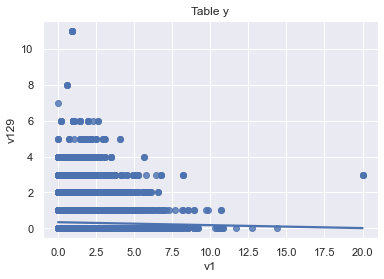

In [27]:
sns.regplot(x="v1", y="v129", ci= None ,data=y)
plt.title("Table y")
plt.savefig("Table y.png")

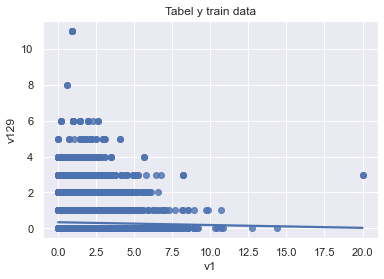

In [28]:
sns.regplot(x="v1", y="v129", ci= None, data=y_train)
plt.title("Tabel y train data")
plt.savefig("Table y train data.png")

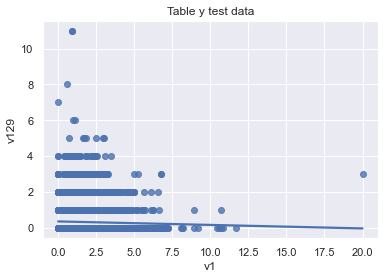

In [29]:
sns.regplot(x="v1", y="v129", ci= None, data=y_test)
plt.title("Table y test data")
plt.savefig("Table y test data.png")

Text(0.5, 1.0, 'correlation matrix table y')

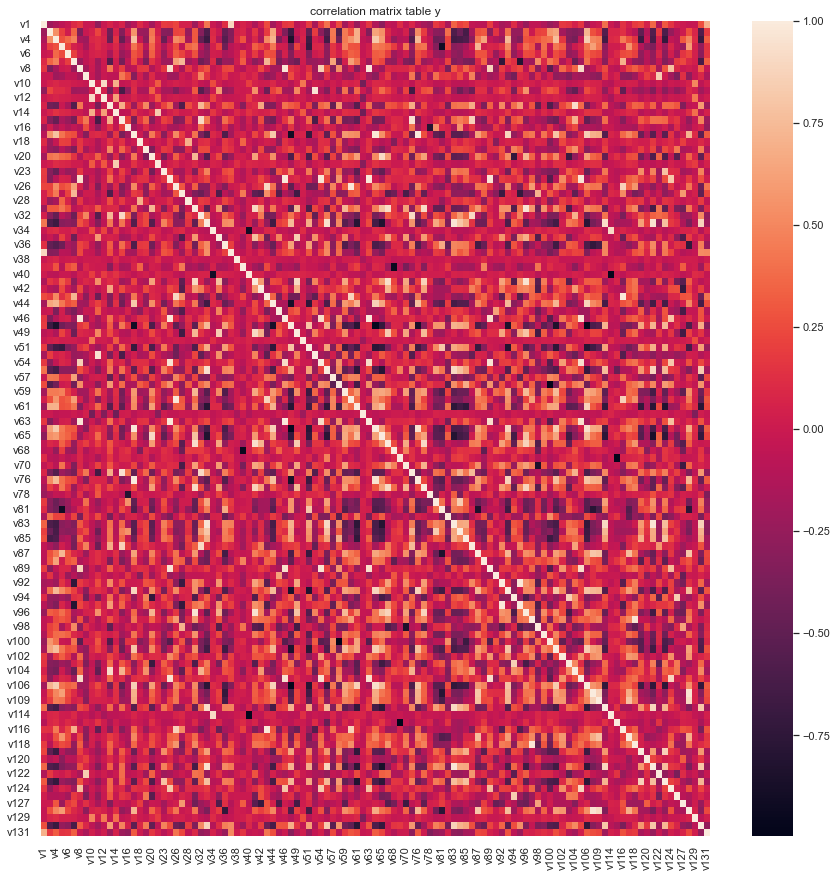

In [30]:
y_only = y.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(y_only)
plt.title("correlation matrix table y")

Text(0.5, 1.0, 'correlation matrix table y train data')

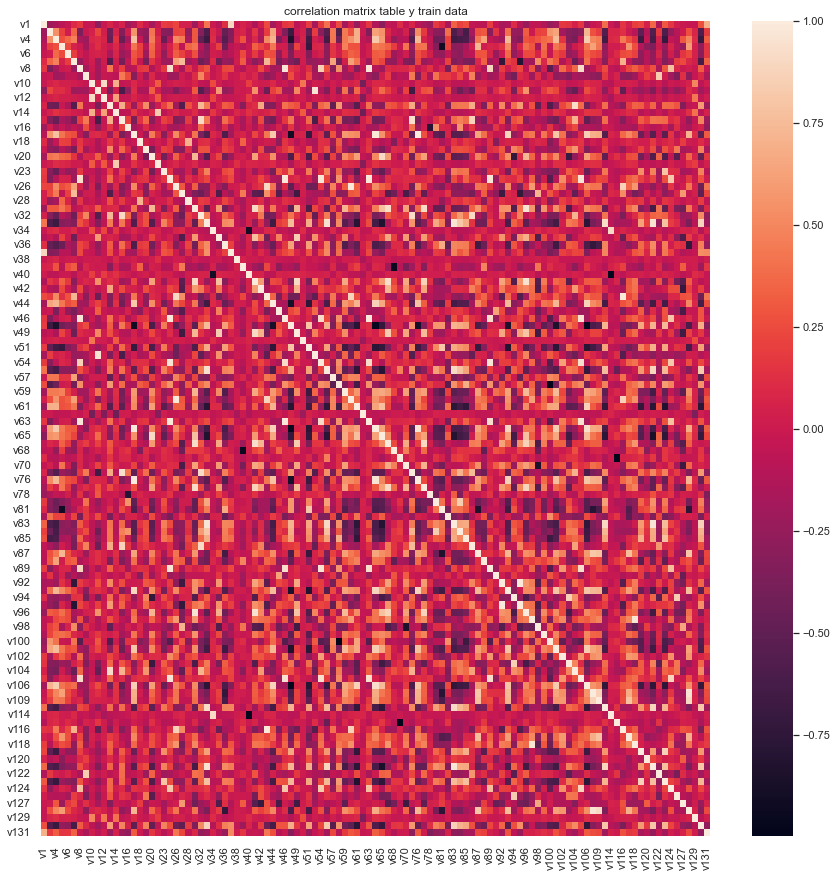

In [31]:
ytrain = y_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(ytrain)
plt.title("correlation matrix table y train data")

Text(0.5, 1.0, 'correlation matrix table y test data')

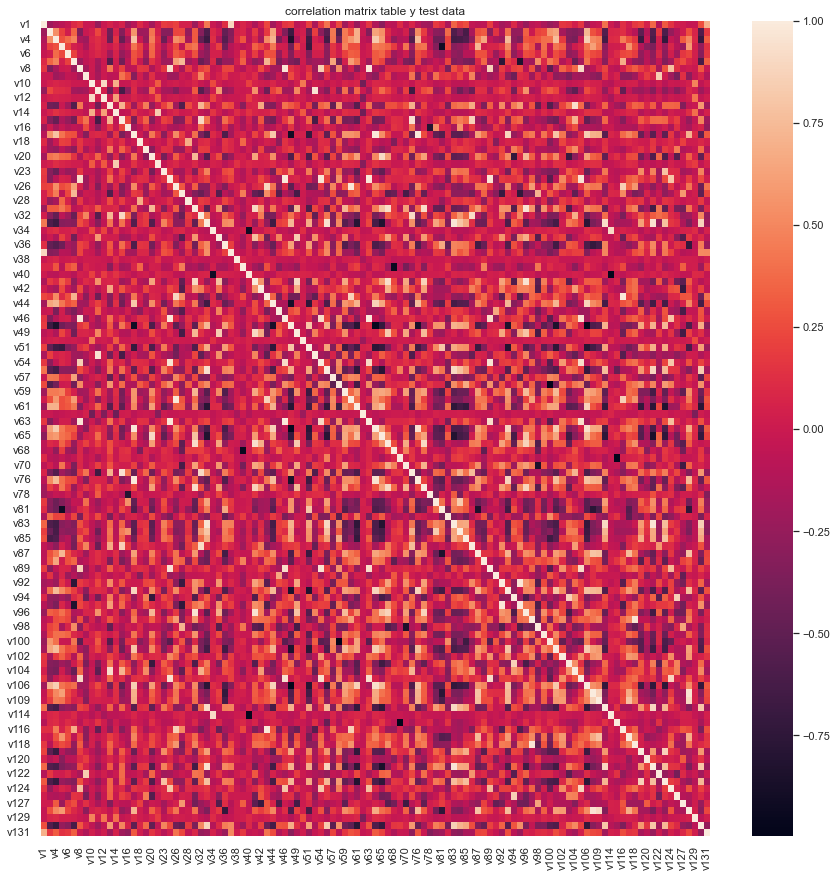

In [32]:
ytest = y_test.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(ytest)
plt.title("correlation matrix table y test data")

Pada assesment ML ini menggunakan R Square metriks. 
Tabel yang diprocess hanya mengambil 100000 rows dengan terdapat bnyak nilai tabel yang masih kosong. 
Pada tabel, kolom : 'v3', 'v22', 'v24', 'v30', 'v31', 'v47', 'v52', 'v56', 'v66', 'v71', 'v72', 'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125' di drop karena data pada kolom berisi data berupa huruf yang tidak berkaitan dengan angka dan tidak dilakukan replace sebagai angka. Hanya menggunakan kolom pada tabel yang berisi angka dan tabel yang masih kosong yang mana nilainya bisa diubah menjadi 0 karena diasumsikan bahwa tabel yang masih kosong tidak ada nilainya atau 0.
Pada regression, test data yang diambil 20000 dan training data yang diambil 80000 didapatkan nilai R square vale train data : 0.07611907655121752 atau 7,611907655121752 % dan nilai R square vale test data : 0.0724529250946816 atau 7,24529250946816 %. 